In [76]:
import os, re, json
import numpy as np

In [14]:
with open('/opt/data4/Face_dataset/CelebA/CelebA/Anno/list_landmarks_align_celeba.txt', 'r') as f:
    lines = f.read().splitlines()[2:]

In [15]:
assert len(lines) == 202599

In [64]:
landmark_list = []
ori_list = []
for i, anno in enumerate(sorted(lines)):
    split = re.split('\W+', anno)
    img_name = split[0] + '.' + split[1]
    landmark = []
    for i in range(5):
        landmark.append((int(split[2 * i + 2]), int(split[2 * i + 3])))
    # transform
    scale = 1.0 * 128 / 178
    landmark_resized = [((x[0])*scale, (x[1] - 20)*scale) for x in landmark]
    #landmark_resized = [(round((x[0])*scale), round((x[1] - 20)*scale)) for x in landmark]
    landmark_resized.insert(0, img_name)
    landmark_list.append(landmark_resized)
    landmark.insert(0, img_name)
    ori_list.append(landmark)

# test

In [25]:
import matplotlib.pyplot as plt
from PIL import Image

In [34]:
root_dir = '/opt/data4/jzy/dataset/Face_dataset/CelebA/img_align_celeba/'
i = -1

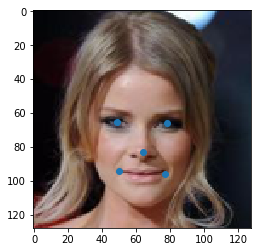

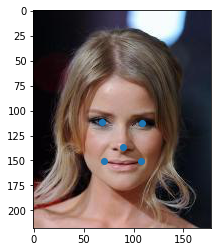

In [62]:
i += 1
sample = landmark_list[i]
img_path = os.path.join(root_dir, sample[0])
landmark = np.reshape(np.array(sample[1:]), (-1, 2))
img = Image.open(img_path)
width, height = img.size
new_width, new_height = min(width, height), min(width, height)
left = (width - new_width)//2
top = (height - new_height)//2
right = (width + new_width)//2
bottom = (height + new_height)//2
cropped = img.crop((left, top, right, bottom))
resized = cropped.resize((128, 128), Image.BICUBIC)
plt.figure()
plt.imshow(resized)
plt.scatter(landmark[:, 0], landmarks[:, 1])
plt.figure()
plt.imshow(img)
ori_landmark = np.reshape(np.array(ori_list[i][1:]), (-1, 2))
plt.scatter(ori_landmark[:, 0], ori_landmark[:, 1])

# write

In [68]:
write_str = ''
for landmark in landmark_list:
    write_str += landmark[0]
    for l in landmark[1:]:
        write_str += ' %.2f %.2f' % (l[0], l[1])
    write_str += '\n'

In [71]:
with open('/opt/data4/jzy/dataset/Face_dataset/CelebA/landmark_center_rescale_128X128.txt', 'w') as f:
    f.write(write_str[:-1])

In [75]:
landmark_dict = {}
for landmark in landmark_list:
    landmark_dict[landmark[0]] = landmark[1:]

In [77]:
with open('/opt/data4/jzy/dataset/Face_dataset/CelebA/landmark_center_rescale_128X128.json', 'w') as f:
    json.dump(landmark_dict, f, indent=2)

In [78]:
with open('/opt/data4/jzy/dataset/Face_dataset/CelebA/landmark_center_rescale_128X128.json', 'r') as f:
    tmp_d = json.load(f)

In [79]:
tmp_d['000001.jpg']

[[49.61797752808989, 64.0],
 [76.2247191011236, 66.87640449438202],
 [55.37078651685393, 87.73033707865169],
 [52.49438202247191, 94.92134831460675],
 [77.6629213483146, 96.35955056179775]]